<a href="https://colab.research.google.com/github/dishitha-mahendrakar/dishitha-mahendrakar/blob/main/makemore%F0%9F%8C%B8mlp%F0%9F%98%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# lets download the dataset
# !wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

In [186]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [187]:
# read in all the words
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [188]:
len(words)

32033

In [189]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [190]:
# build the dataset
block_size = 3 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [191]:
# build the dataset
block_size = 4 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
.... ---> e
...e ---> m
..em ---> m
.emm ---> a
emma ---> .
olivia
.... ---> o
...o ---> l
..ol ---> i
.oli ---> v
oliv ---> i
livi ---> a
ivia ---> .
ava
.... ---> a
...a ---> v
..av ---> a
.ava ---> .
isabella
.... ---> i
...i ---> s
..is ---> a
.isa ---> b
isab ---> e
sabe ---> l
abel ---> l
bell ---> a
ella ---> .
sophia
.... ---> s
...s ---> o
..so ---> p
.sop ---> h
soph ---> i
ophi ---> a
phia ---> .


In [192]:
# build the dataset
block_size = 5 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
..... ---> e
....e ---> m
...em ---> m
..emm ---> a
.emma ---> .
olivia
..... ---> o
....o ---> l
...ol ---> i
..oli ---> v
.oliv ---> i
olivi ---> a
livia ---> .
ava
..... ---> a
....a ---> v
...av ---> a
..ava ---> .
isabella
..... ---> i
....i ---> s
...is ---> a
..isa ---> b
.isab ---> e
isabe ---> l
sabel ---> l
abell ---> a
bella ---> .
sophia
..... ---> s
....s ---> o
...so ---> p
..sop ---> h
.soph ---> i
sophi ---> a
ophia ---> .


In [193]:
# build the dataset
block_size = 10 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
.......... ---> e
.........e ---> m
........em ---> m
.......emm ---> a
......emma ---> .
olivia
.......... ---> o
.........o ---> l
........ol ---> i
.......oli ---> v
......oliv ---> i
.....olivi ---> a
....olivia ---> .
ava
.......... ---> a
.........a ---> v
........av ---> a
.......ava ---> .
isabella
.......... ---> i
.........i ---> s
........is ---> a
.......isa ---> b
......isab ---> e
.....isabe ---> l
....isabel ---> l
...isabell ---> a
..isabella ---> .
sophia
.......... ---> s
.........s ---> o
........so ---> p
.......sop ---> h
......soph ---> i
.....sophi ---> a
....sophia ---> .


In [194]:
# build the dataset
block_size = 3 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [195]:
X.shape,X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [196]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [197]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [198]:
C = torch.randn((27,2))

In [199]:
C

tensor([[-0.2003,  1.4353],
        [ 0.9817, -0.6066],
        [ 0.5586, -1.2193],
        [ 0.4495, -1.1605],
        [-0.5770, -0.3777],
        [ 0.1426,  0.9666],
        [ 0.3408, -1.3513],
        [-0.5064,  0.0797],
        [-1.6912,  0.7026],
        [-0.3521,  3.5022],
        [-0.5471, -0.5505],
        [-0.4930,  0.3817],
        [ 0.0089,  0.4102],
        [-2.6900,  0.6981],
        [ 0.5873,  1.4569],
        [ 1.3109,  1.1043],
        [ 1.4437, -0.0674],
        [ 0.9421, -0.0147],
        [ 0.4522, -0.5036],
        [-0.7050, -1.8455],
        [ 0.4037,  1.4506],
        [-2.5669, -0.5177],
        [-0.0800,  0.8231],
        [-0.4662,  1.5747],
        [-1.6272,  0.5379],
        [-0.2434,  0.4555],
        [ 0.2837, -1.1244]])

In [200]:
C[5]

tensor([0.1426, 0.9666])

In [201]:
# F.one_hot(5, num_classes=27)
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-28-9806a4d8547b> in <cell line: 1>()
# ----> 1 F.one_hot(5, num_classes=27)
#       2 # F.one_hot(torch.tensor(5), num_classes=27)

# TypeError: one_hot(): argument 'input' (position 1) must be Tensor, not int


In [202]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [203]:
F.one_hot(torch.tensor(5), num_classes=27).shape

torch.Size([27])

In [204]:
# F.one_hot(torch.tensor(5), num_classes=27) @ C

# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# <ipython-input-32-399fa32a588d> in <cell line: 1>()
# ----> 1 F.one_hot(torch.tensor(5), num_classes=27) @ C

# RuntimeError: expected scalar type Long but found Float

In [205]:
F.one_hot(torch.tensor(5), num_classes=27).dtype

torch.int64

In [206]:
C.dtype

torch.float32

In [207]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.1426, 0.9666])

In [208]:
C[torch.tensor([5,6,7])]

tensor([[ 0.1426,  0.9666],
        [ 0.3408, -1.3513],
        [-0.5064,  0.0797]])

In [209]:
C[torch.tensor([5,6,7,7,7,7,7])]

tensor([[ 0.1426,  0.9666],
        [ 0.3408, -1.3513],
        [-0.5064,  0.0797],
        [-0.5064,  0.0797],
        [-0.5064,  0.0797],
        [-0.5064,  0.0797],
        [-0.5064,  0.0797]])

In [210]:
C[X].shape

torch.Size([32, 3, 2])

In [211]:
X[13, 2]

tensor(1)

In [212]:
C[X][13, 2]

tensor([ 0.9817, -0.6066])

In [213]:
C[1]

tensor([ 0.9817, -0.6066])

In [214]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [215]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [216]:
# emb @ W1 + b1

# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# <ipython-input-34-355728df8662> in <cell line: 1>()
# ----> 1 emb @ W1 + b1

# RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [217]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]])

tensor([[-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [ 0.1426,  0.9666],
        [-2.6900,  0.6981],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [ 1.3109,  1.1043],
        [ 0.0089,  0.4102],
        [-0.3521,  3.5022],
        [-0.0800,  0.8231],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [ 0.9817, -0.6066],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.3521,  3.5022],
        [-0.7050, -1.8455],
        [ 0.9817, -0.6066],
        [ 0.5586, -1.2193],
        [ 0.1426,  0.9666],
        [ 0.0089,  0.4102],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [-0.7050, -1.8455],
        [ 1.3109,  1.1043],
        [ 1.4437, -0.0674],
        [-1.6912,  0.7026],
        [-0.2003,  1.4353],
        [-0.2003,  1.4353],
        [ 0.1426,  0.9666],
        [-2.6900,  0

In [218]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1).shape

torch.Size([32, 6])

In [219]:
torch.unbind(emb, 1)

(tensor([[-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [ 0.1426,  0.9666],
         [-2.6900,  0.6981],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [ 1.3109,  1.1043],
         [ 0.0089,  0.4102],
         [-0.3521,  3.5022],
         [-0.0800,  0.8231],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [ 0.9817, -0.6066],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.3521,  3.5022],
         [-0.7050, -1.8455],
         [ 0.9817, -0.6066],
         [ 0.5586, -1.2193],
         [ 0.1426,  0.9666],
         [ 0.0089,  0.4102],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [-0.7050, -1.8455],
         [ 1.3109,  1.1043],
         [ 1.4437, -0.0674],
         [-1.6912,  0.7026]]),
 tensor([[-0.2003,  1.4353],
         [-0.2003,  1.4353],
         [ 0

In [220]:
len(torch.unbind(emb, 1))

3

In [221]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [222]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [223]:
a.shape

torch.Size([18])

In [224]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [225]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [226]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [227]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [228]:
emb.shape

torch.Size([32, 3, 2])

In [229]:
emb.view(32,6)

tensor([[-0.2003,  1.4353, -0.2003,  1.4353, -0.2003,  1.4353],
        [-0.2003,  1.4353, -0.2003,  1.4353,  0.1426,  0.9666],
        [-0.2003,  1.4353,  0.1426,  0.9666, -2.6900,  0.6981],
        [ 0.1426,  0.9666, -2.6900,  0.6981, -2.6900,  0.6981],
        [-2.6900,  0.6981, -2.6900,  0.6981,  0.9817, -0.6066],
        [-0.2003,  1.4353, -0.2003,  1.4353, -0.2003,  1.4353],
        [-0.2003,  1.4353, -0.2003,  1.4353,  1.3109,  1.1043],
        [-0.2003,  1.4353,  1.3109,  1.1043,  0.0089,  0.4102],
        [ 1.3109,  1.1043,  0.0089,  0.4102, -0.3521,  3.5022],
        [ 0.0089,  0.4102, -0.3521,  3.5022, -0.0800,  0.8231],
        [-0.3521,  3.5022, -0.0800,  0.8231, -0.3521,  3.5022],
        [-0.0800,  0.8231, -0.3521,  3.5022,  0.9817, -0.6066],
        [-0.2003,  1.4353, -0.2003,  1.4353, -0.2003,  1.4353],
        [-0.2003,  1.4353, -0.2003,  1.4353,  0.9817, -0.6066],
        [-0.2003,  1.4353,  0.9817, -0.6066, -0.0800,  0.8231],
        [ 0.9817, -0.6066, -0.0800,  0.8

In [230]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [231]:
h = emb.view(32, 6) @ W1 + b1

In [232]:
h.shape

torch.Size([32, 100])

In [233]:
h

tensor([[-0.2968,  2.8040, -0.4095,  ..., -0.4998,  1.1060,  2.3709],
        [ 0.0965,  2.8039,  0.1539,  ...,  0.1347,  0.4678,  2.3464],
        [-1.0105,  1.4265,  0.7367,  ..., -1.8488, -0.3088,  3.8391],
        ...,
        [-4.4868,  1.3230, -6.3340,  ..., -0.1786,  1.6890,  2.1354],
        [-1.0796,  2.5969, -8.3475,  ..., -2.3118,  6.2917,  3.6955],
        [ 1.5702,  5.1202,  6.5454,  ...,  0.1734, -4.1116,  1.4223]])

In [234]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [235]:
h

tensor([[-0.2883,  0.9927, -0.3880,  ..., -0.4619,  0.8026,  0.9827],
        [ 0.0962,  0.9927,  0.1527,  ...,  0.1339,  0.4364,  0.9818],
        [-0.7660,  0.8909,  0.6272,  ..., -0.9516, -0.2993,  0.9991],
        ...,
        [-0.9997,  0.8675, -1.0000,  ..., -0.1768,  0.9340,  0.9724],
        [-0.7930,  0.9890, -1.0000,  ..., -0.9806,  1.0000,  0.9988],
        [ 0.9171,  0.9999,  1.0000,  ...,  0.1716, -0.9995,  0.8901]])

In [236]:
h.shape

torch.Size([32, 100])

In [237]:
(emb.view(-1, 6) @ W1).shape

torch.Size([32, 100])

In [238]:
b1.shape

torch.Size([100])

In [239]:
# 23, 100
#  1, 100

In [240]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [241]:
logits = h @ W2 + b2

In [242]:
logits.shape

torch.Size([32, 27])

In [243]:
counts = logits.exp()

In [244]:
prob = counts / counts.sum(1, keepdims = True)

In [245]:
prob.shape

torch.Size([32, 27])

In [246]:
prob[0]

tensor([6.4811e-08, 5.3665e-06, 5.8566e-06, 2.7931e-04, 9.3593e-04, 1.4094e-14,
        6.4105e-02, 5.5815e-11, 6.0499e-06, 1.7839e-03, 1.7302e-08, 4.4338e-01,
        1.1342e-03, 1.1018e-12, 2.2372e-06, 2.9738e-07, 4.3278e-10, 1.5560e-04,
        4.3817e-04, 2.7186e-11, 1.6751e-08, 1.9452e-05, 3.0536e-02, 6.4498e-06,
        4.2899e-01, 1.8281e-10, 2.8223e-02])

In [247]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [248]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [249]:
prob[torch.arange(32),Y]

tensor([1.4094e-14, 1.0675e-13, 2.8680e-10, 2.0426e-10, 4.9280e-05, 2.9738e-07,
        9.7652e-04, 1.7744e-10, 1.6294e-03, 5.0581e-12, 4.5651e-04, 4.4865e-15,
        5.3665e-06, 9.2698e-10, 6.6790e-02, 1.6271e-15, 1.7839e-03, 6.6804e-11,
        3.4159e-15, 1.7903e-08, 9.4623e-03, 2.8073e-11, 2.6857e-05, 7.9524e-06,
        2.8963e-09, 2.7186e-11, 1.7325e-16, 1.0958e-11, 4.8444e-12, 4.6513e-05,
        7.7666e-04, 4.5821e-16])

In [250]:
loss = -prob[torch.arange(32),Y].log().mean()

In [251]:
loss

tensor(19.3557)

In [252]:
# ----------- now made respectable :) -----------

In [253]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [254]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [255]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [256]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6)@ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.1954)

In [257]:
F.cross_entropy(logits, Y)

tensor(17.1954)

In [258]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6)@ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims = True)
loss = -prob[torch.arange(32), Y].log().mean()
F.cross_entropy(logits, Y)
loss

tensor(17.1954)

In [259]:
emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6)@ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims = True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(17.1954)

In [260]:
logits = torch.tensor([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [261]:
logits = torch.tensor([-100, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 3.3311e-04, 6.6906e-03, 9.9298e-01])

In [262]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00, 1.4841e+02])

In [263]:
logits = torch.tensor([-5, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [264]:
logits = torch.tensor([-5, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [265]:
for p in parameters:
  p.requires_grad = True


In [266]:
for _ in range(1000):
  # forward pass
  emb = C[X] # (32,3,2)
  h = torch.tanh(emb.view(-1,6)@ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())


0.25716733932495117


In [267]:
logits.max(1)

torch.return_types.max(
values=tensor([10.5619, 18.2605, 14.1086, 15.6583, 16.4829, 10.5619, 14.9888, 16.1836,
        15.5150, 12.4873, 12.3325, 15.2746, 10.5619, 14.7331, 13.1925, 15.6202,
        10.5619, 11.7374, 11.4912, 14.4042, 18.5130, 12.6035, 14.2753, 19.7102,
        14.4547, 10.5619, 15.1336, 14.3199, 15.9459, 14.7630, 15.2991, 17.2535],
       grad_fn=<MaxBackward0>),
indices=tensor([15, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0, 15, 22,  1,  0, 15, 19,
         1,  2,  5, 12, 12,  1,  0, 15, 15, 16,  8,  9,  1,  0]))

In [268]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [269]:
# build the dataset
block_size = 3 # context length : how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [270]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [271]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [272]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [273]:
for p in parameters:
  p.requires_grad = True

In [274]:
for _ in range(10):
  # forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -0.1 * p.grad

10.774582862854004
10.183908462524414
9.704809188842773
9.272878646850586
8.881112098693848
8.528128623962402
8.210748672485352
7.921436309814453
7.654129981994629
7.407318115234375


In [275]:
torch.randint(0,X.shape[0],(32,))

tensor([173700, 142820,  19919,  32218, 136320,  34124,  96546,  22690,  73598,
         17417, 194254, 126175, 143513, 219872, 134388, 157164, 225169,  91462,
         60210, 100239, 170140,  70109, 223339,  67324,  41689,  56964, 210726,
         31341,  31539, 211871,   9317,  57973])

In [276]:
for _ in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())


2.7448859214782715


In [277]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5794, grad_fn=<NllLossBackward0>)

In [278]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [279]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [280]:
for p in parameters:
  p.requires_grad = True

In [281]:
for _ in range(100):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -0.0001 * p.grad

14.997377395629883
16.21068000793457
15.696922302246094
12.979949951171875
15.54840087890625
13.434808731079102
15.520953178405762
16.415637969970703
18.469491958618164
13.987732887268066
15.850933074951172
13.121248245239258
18.098861694335938
17.832002639770508
16.463886260986328
14.934577941894531
16.942901611328125
16.054182052612305
13.98169994354248
18.02461814880371
16.7567081451416
14.949583053588867
17.344141006469727
16.987873077392578
17.710126876831055
17.13772964477539
14.364163398742676
19.499774932861328
16.759004592895508
15.949048042297363
16.218372344970703
16.365127563476562
16.66436004638672
16.114797592163086
18.79494285583496
18.62222671508789
12.468947410583496
15.803288459777832
14.75218391418457
18.671907424926758
17.17235565185547
18.554853439331055
16.499401092529297
15.989068031311035
16.195085525512695
18.541128158569336
12.359395027160645
15.468988418579102
20.39019012451172
16.329856872558594
15.038814544677734
15.150623321533203
17.968242645263672
17.973

In [282]:
for _ in range(100):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -0.001 * p.grad

17.40644073486328
16.581933975219727
16.704936981201172
17.301713943481445
20.009653091430664
13.656049728393555
15.772424697875977
15.072943687438965
16.343660354614258
16.063220977783203
17.44941520690918
16.848974227905273
18.642078399658203
15.58322525024414
14.047916412353516
17.906421661376953
15.684799194335938
17.49288558959961
15.5504789352417
17.168668746948242
16.63799285888672
18.068592071533203
15.868171691894531
16.65591049194336
16.740859985351562
13.249397277832031
17.804237365722656
14.550641059875488
15.855925559997559
14.386832237243652
17.281890869140625
14.006190299987793
15.820780754089355
16.0087833404541
15.72542667388916
18.45969009399414
16.10437774658203
19.604145050048828
18.69734764099121
14.56588077545166
14.521283149719238
16.511951446533203
14.728374481201172
15.121983528137207
15.262250900268555
14.931893348693848
12.959787368774414
15.53111743927002
14.918021202087402
14.143035888671875
14.665407180786133
14.718818664550781
17.184009552001953
16.328796

In [283]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

In [284]:
for _ in range(100):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -1 * p.grad

17.587465286254883
13.140552520751953
8.911924362182617
14.327072143554688
13.276288986206055
12.728935241699219
11.782482147216797
9.277727127075195
12.963190078735352
10.447203636169434
9.860833168029785
6.956441402435303
10.844033241271973
8.964221954345703
8.318912506103516
14.197369575500488
9.340306282043457
9.383813858032227
9.73121166229248
14.338300704956055
8.558235168457031
9.3104829788208
10.936467170715332
6.386285781860352
11.648948669433594
8.894325256347656
7.423068046569824
8.309367179870605
11.628705024719238
7.100929260253906
8.991196632385254
7.213946342468262
8.232465744018555
8.51993465423584
8.663345336914062
7.480852127075195
7.086985111236572
7.335773468017578
7.235729694366455
7.9110236167907715
7.151099681854248
7.455477237701416
6.491115570068359
6.245202541351318
9.254670143127441
6.552253723144531
6.433926582336426
8.482234954833984
6.611621856689453
5.573718070983887
7.97747802734375
6.8679070472717285
6.562402248382568
5.213774681091309
7.850923538208008

In [285]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

In [286]:
for _ in range(100):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -10 * p.grad

15.239903450012207
60.376678466796875
48.952701568603516
44.03909683227539
32.279701232910156
75.85865783691406
64.78687286376953
76.80577850341797
72.86477661132812
82.60331726074219
58.849491119384766
76.76349639892578
100.03971862792969
112.5082015991211
129.51075744628906
117.78897857666016
95.73504638671875
92.14991760253906
95.24547576904297
132.5435791015625
128.15628051757812
97.89569854736328
93.91386413574219
74.78316497802734
106.64950561523438
91.62806701660156
81.5693130493164
114.69017028808594
85.70527648925781
89.01229858398438
106.05902099609375
69.45834350585938
88.82080841064453
81.74813842773438
67.04415130615234
75.96145629882812
69.36727142333984
73.55685424804688
72.17838287353516
74.3465576171875
78.26026153564453
68.92207336425781
53.83309555053711
68.58545684814453
56.44586181640625
44.79613494873047
73.2553482055664
80.38614654541016
79.53878784179688
76.02436065673828
69.65573120117188
74.99574279785156
45.178497314453125
40.08071517944336
52.3805046081543
5

In [287]:
# learning rate exponent
lre = torch.linspace(-3, 0, 1000)
lrs = 10 **lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 



```
so now what we're doing is we're stepping linearly between the exponents of these learning rates
this is 0.001 and this is 1
because 10 to the power of 0 is 1
and therefore we are spaced exponentially in this interval
so these are the candidate learning rates that we want to sort of like search over roughly
so now what we're going to do is
here
we are going to run the optimization for 1000 steps
and instead of using a fixed number
we are going to use learning rate indexing into here lrs[i] and make this i
```



In [288]:
for i in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -10 * p.grad

89.55757904052734
56.014381408691406
84.59490966796875
85.09823608398438
89.084716796875
88.92105865478516
151.17189025878906
86.69950866699219
77.12872314453125
89.93009185791016
130.23794555664062
119.12036895751953
79.57099151611328
98.36083221435547
109.6575927734375
73.92991638183594
86.33348846435547
96.99336242675781
98.40413665771484
58.255619049072266
63.9551887512207
95.89204406738281
90.43685150146484
59.551422119140625
66.53174591064453
77.31544494628906
84.63345336914062
68.69499206542969
72.79120635986328
85.71089935302734
79.11043548583984
57.65470886230469
67.6478500366211
52.86865234375
65.1870346069336
56.20089340209961
66.74880981445312
63.97393798828125
61.96580123901367
69.04270935058594
86.42560577392578
68.53750610351562
44.13744354248047
60.894073486328125
42.82250213623047
85.60076904296875
81.964599609375
52.49494552612305
70.6773452758789
63.72026062011719
78.04463958740234
73.57765197753906
65.6247329711914
73.1513442993164
53.18355178833008
53.0099334716796



```
so basically let me reset this to be again starting from random
creating these learning rates between 0.001 and 1 but exponentially stepped
and here what we're doing is
we're iterating a thousand times
we're going to use the learning rate
that's in the beginning very very low
in the beginnning is going to be 0.001
but by the end it's going to be 1
and then we are going to step with that learning rate
and now what we want to do
is we want to keep track of the learning rates that we used
and we want to look at the losses that resulted
and so here let me track that
so lri.append(i)
lossi.append(loss.item())
```



In [289]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [290]:
lri = []
lossi = []

for i in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lr)
  lossi.append(loss.item())

16.55557632446289
17.295164108276367
16.624279022216797
15.263615608215332
18.291149139404297
18.444225311279297
13.46794319152832
16.050630569458008
17.1691951751709
18.086854934692383
18.569774627685547
18.142915725708008
14.29269790649414
14.025483131408691
17.606386184692383
14.999067306518555
18.635059356689453
15.584386825561523
13.255993843078613
14.558335304260254
14.760538101196289
18.07546043395996
19.080923080444336
13.856868743896484
14.665324211120605
18.68344497680664
14.668941497802734
14.244550704956055
14.035018920898438
16.58503532409668
15.0166654586792
15.131577491760254
14.678653717041016
15.7213134765625
16.64773178100586
16.314434051513672
15.820428848266602
15.076993942260742
16.989336013793945
16.041603088378906
15.236464500427246
15.807601928710938
19.47970962524414
14.834478378295898
15.39082145690918
15.340774536132812
15.733842849731445
18.355504989624023
17.009166717529297
15.144153594970703
17.856184005737305
15.161333084106445
14.907917022705078
13.32947

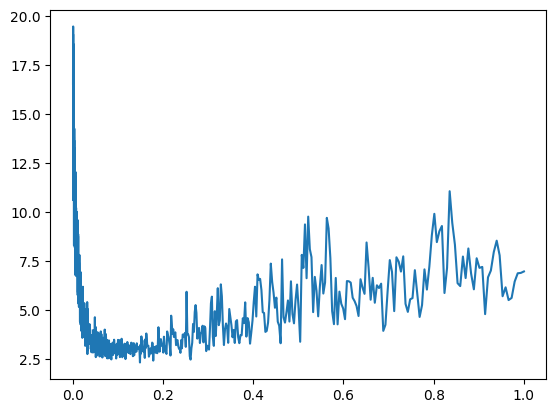

In [291]:
plt.plot(lri, lossi)

In [292]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [293]:
lri = []
lossi = []

for i in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lre[i])
  lossi.append(loss.item())

14.86767292022705
15.864974975585938
17.0523738861084
14.95516586303711
16.506919860839844
16.173017501831055
16.615312576293945
17.884159088134766
15.593117713928223
15.367817878723145
18.320159912109375
13.525135040283203
16.152725219726562
16.733055114746094
16.90281867980957
17.796846389770508
14.40401840209961
15.994059562683105
16.003225326538086
16.585948944091797
14.221712112426758
14.325373649597168
17.31401824951172
14.917776107788086
14.302827835083008
16.680700302124023
17.653804779052734
14.228597640991211
13.861038208007812
15.152281761169434
15.187108993530273
12.131367683410645
19.025325775146484
14.501827239990234
14.916698455810547
15.050207138061523
15.78813648223877
16.11856460571289
17.300100326538086
15.467761039733887
18.121767044067383
14.880587577819824
14.541187286376953
14.6558198928833
15.516620635986328
14.798907279968262
13.885333061218262
15.533802032470703
15.361006736755371
14.638028144836426
14.92863655090332
13.587728500366211
14.664999008178711
16.00

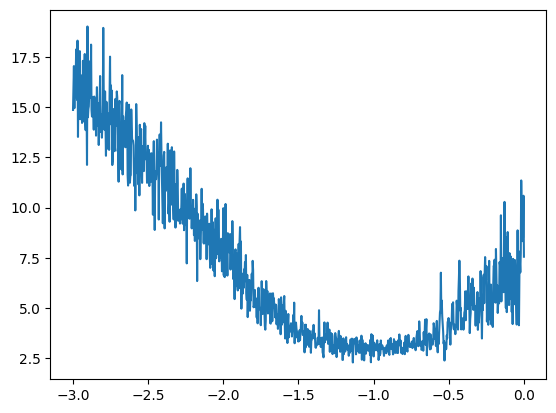

In [294]:
plt.plot(lri,lossi)

In [295]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [296]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [297]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4950, grad_fn=<NllLossBackward0>)

In [298]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [299]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4366, grad_fn=<NllLossBackward0>)

In [300]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [301]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3892, grad_fn=<NllLossBackward0>)

In [302]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3776, grad_fn=<NllLossBackward0>)

In [303]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3174, grad_fn=<NllLossBackward0>)

In [304]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3160, grad_fn=<NllLossBackward0>)

In [305]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3121, grad_fn=<NllLossBackward0>)

In [306]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3152, grad_fn=<NllLossBackward0>)

In [307]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3108, grad_fn=<NllLossBackward0>)

In [308]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [309]:
# build the dataset

def build_dataset(words):
  block_size = 3 # context length : how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [310]:
len(words)

32033

In [311]:
n1

25626

In [312]:
n2

28829

In [313]:
n2 - n1

3203

In [314]:
len(words) - n2

3204

In [315]:
# ------

In [316]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [317]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [318]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())


In [319]:
print(loss.item())

2.2727787494659424


In [320]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())


In [321]:
print(loss.item())

2.560300827026367


In [322]:
lri = []
lossi = []

for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())


In [323]:
print(loss.item())

2.4023022651672363


In [324]:
lri = []
lossi = []

for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [325]:
print(loss.item())

2.575364589691162


In [326]:
lri = []
lossi = []

for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

2.2641942501068115


In [327]:

emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4208, grad_fn=<NllLossBackward0>)

In [328]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # number of parameters in total

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [329]:
lri = []
lossi = []

for i in range(20000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [330]:
print(loss.item())

2.370497941970825


In [331]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4987, grad_fn=<NllLossBackward0>)

In [332]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4904, grad_fn=<NllLossBackward0>)

In [333]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [334]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [335]:
print(loss.item())

2.6909966468811035


In [343]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

2.6325697898864746


In [344]:
lri = []
lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

2.204033374786377


In [345]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3139, grad_fn=<NllLossBackward0>)

In [346]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3152, grad_fn=<NllLossBackward0>)

In [347]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]



In [348]:
sum(p.nelement() for p in parameters) # number of parameters in total


10281

In [349]:

for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [350]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

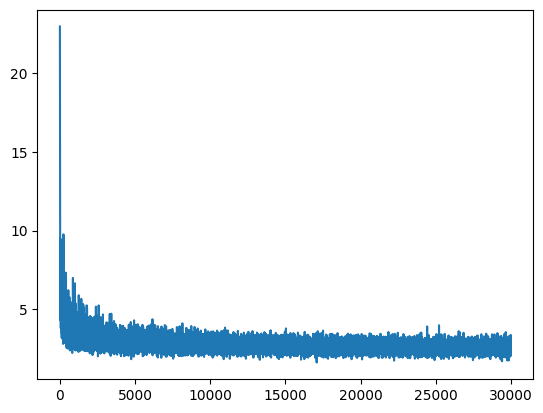

In [351]:
plt.plot(stepi, lossi)

In [352]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.5443, grad_fn=<NllLossBackward0>)

In [353]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.5382, grad_fn=<NllLossBackward0>)



```
lets continue training
```



In [354]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())



```
one possibility is that the batch size is so low
```



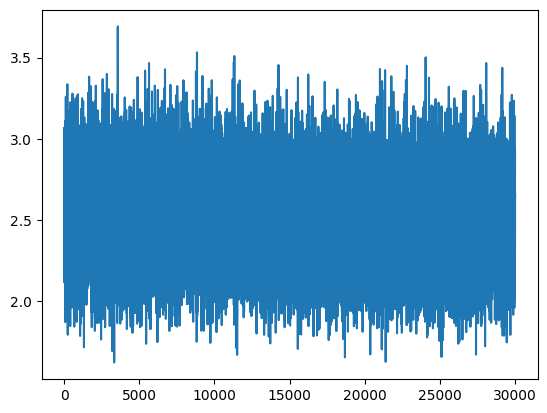

In [355]:
plt.plot(stepi, lossi)

In [356]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4380, grad_fn=<NllLossBackward0>)

In [357]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4362, grad_fn=<NllLossBackward0>)

In [358]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.05
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

In [359]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3115, grad_fn=<NllLossBackward0>)

In [360]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3174, grad_fn=<NllLossBackward0>)

In [361]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.05
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

In [362]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3022, grad_fn=<NllLossBackward0>)

In [364]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3060, grad_fn=<NllLossBackward0>)

In [366]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

In [367]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2313, grad_fn=<NllLossBackward0>)

In [368]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2360, grad_fn=<NllLossBackward0>)

In [369]:
# lri = []
# lossi = []
# stepi = []
# for i in range(30000):
#   # minibatch construct
#   ix = torch.randint(0, Xtr.shape[0], (32,))
#   # forward pass
#   emb = C[Xtr[ix]] # (32, 3, 2)
#   h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
#   logits = h @ W2 + b2 # (32, 27)
#   loss = F.cross_entropy(logits, Ytr[ix])
#   # print(loss.item())

#   # backward pass
#   for p in parameters:
#     p.grad = None
#   loss.backward()

#   # update
#   # lr = lrs[i]
#   lr = 0.01
#   for p in parameters:
#     p.data += -lr * p.grad

#   # track stats
#   # lri.append(lre[i])
#   stepi.append(i)
#   lossi.append(loss.item())

# emb = C[Xtr] # (32, 3, 2)
# h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
# logits = h @ W2 + b2 # (32, 27)
# loss = F.cross_entropy(logits, Ytr)
# loss

# tensor(2.2316, grad_fn=<NllLossBackward0>)

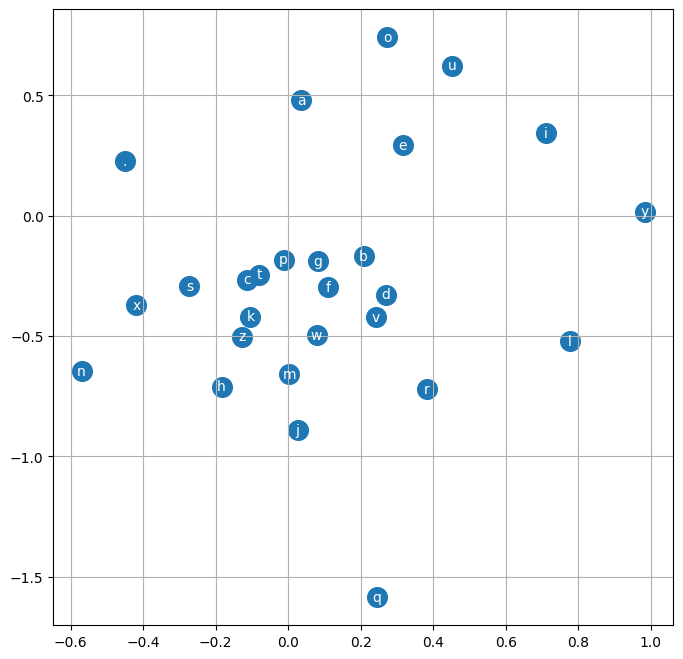

In [371]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va="center", color = 'white')
plt.grid('minor')

In [385]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [386]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [387]:
for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [388]:
lri = []
lossi = []
stepi = []

In [389]:
for i in range(50000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

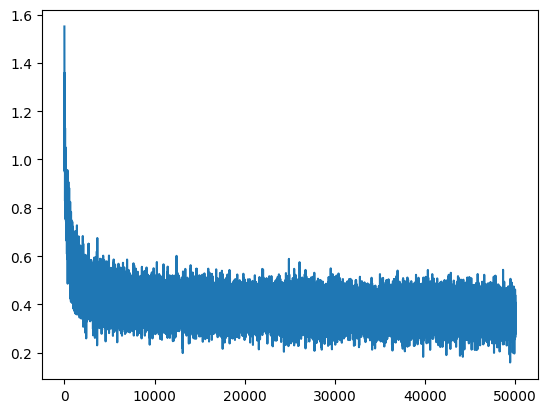

In [390]:
plt.plot(stepi, lossi)

In [391]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3550, grad_fn=<NllLossBackward0>)

In [392]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3779, grad_fn=<NllLossBackward0>)

In [393]:
for i in range(50000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

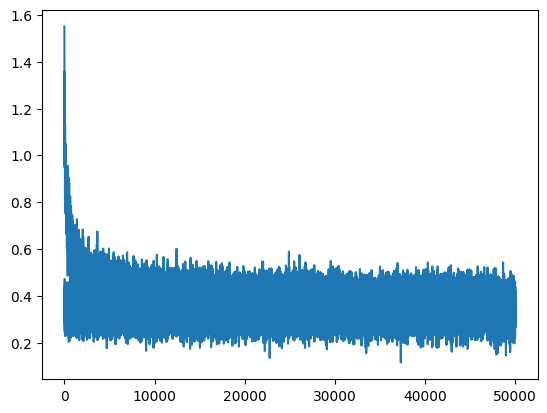

In [394]:
plt.plot(stepi, lossi)

In [395]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1805, grad_fn=<NllLossBackward0>)

In [396]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2052, grad_fn=<NllLossBackward0>)

In [397]:
for i in range(50000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

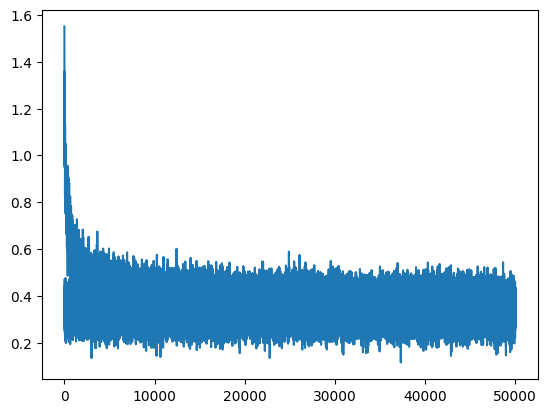

In [398]:
plt.plot(stepi, lossi)

In [399]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1707, grad_fn=<NllLossBackward0>)

In [400]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1956, grad_fn=<NllLossBackward0>)

In [401]:
g = torch.Generator().manual_seed(2147484767) # for reproducability
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [402]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [403]:
for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [404]:
lri = []
lossi = []
stepi = []

In [405]:
for i in range(200000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

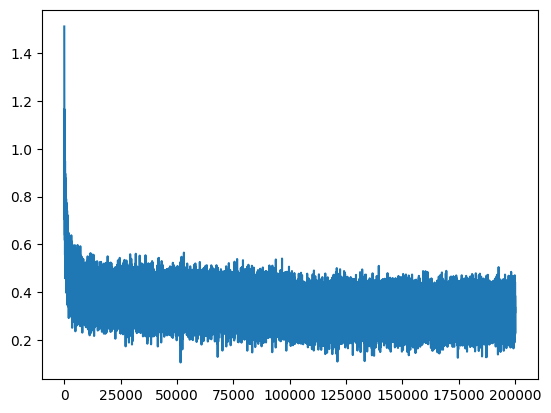

In [406]:
plt.plot(stepi, lossi)

In [407]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1211, grad_fn=<NllLossBackward0>)

In [408]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1617, grad_fn=<NllLossBackward0>)

In [411]:
# sample from the model
g = torch.Generator().manual_seed(2147484767 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size # initialize with all ...
  while True:
    emb = C[torch.tensor([context])] # (1, block_size, d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

madijo.
hudwe.
ini.
jezi.
alarerteen.
kenausene.
aquhlo.
per.
onati.
caperseemarqueen.
ameis.
dariannishn.
lagadlyn.
rice.
aleia.
ahrosson.
calondalyn.
mahdila.
arlakhit.
chainei.
